In [1]:
from sklearn import datasets, svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble

In [2]:
#load data from dataset
lfw = datasets.fetch_lfw_people(min_faces_per_person = 100, resize= 0.4)

In [3]:
#data is in form of dictinoary and we can get it's keys
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
set(lfw.target)

{0, 1, 2, 3, 4}

In [5]:
lfw.data.shape

(1140, 1850)

In [6]:
lfw.images.shape

(1140, 50, 37)

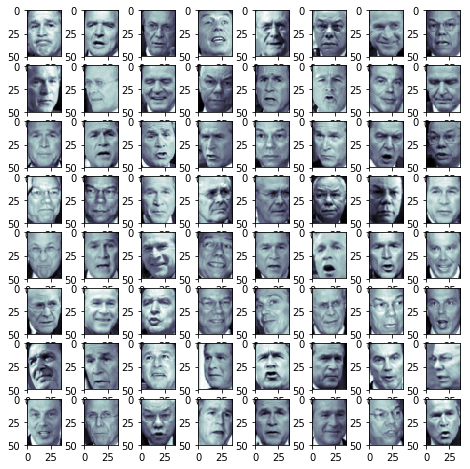

In [7]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i], cmap=plt.cm.bone)
plt.show()

In [8]:
x, y = lfw.data, lfw.target
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

In [9]:
#find the principal axis for all the data 
pca_1 = PCA()
pca_1.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
#obtain number to components needed to maintain aunthenticity.
#or to get the axis where our data changes the most.
k = 0
total = pca_1.explained_variance_.sum()
currentsum = 0
while currentsum/total<0.99:
    currentsum += pca_1.explained_variance_[k]
    k = k+1
k

316

In [22]:
pca_lfw = PCA(n_components = k, whiten=True)
x_transformed = pca_lfw.fit_transform(x_train)
x_transformed.shape

(855, 316)

In [23]:
#retransform to plot the faces.
x_approx = pca_lfw.inverse_transform(x_transformed)
x_approx = x_approx.reshape((855,50,37))

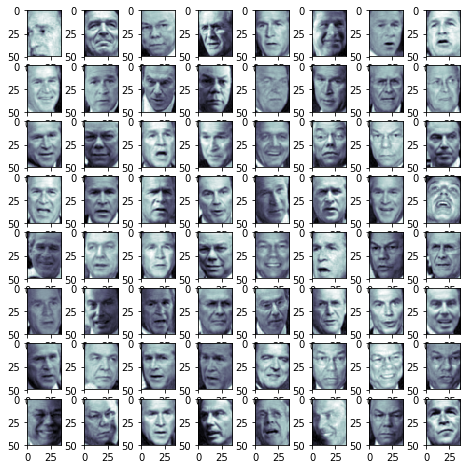

In [24]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx[i], cmap=plt.cm.bone)
plt.show()

In [23]:
x_train_pca = x_transformed
x_test_pca = pca_lfw.transform(x_test)

In [27]:
import time

In [31]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train, y_train)
end = time.time()
print(end-start)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.23641753196716309
              precision    recall  f1-score   support

           0       0.66      0.62      0.64        61
           1       0.79      0.31      0.44        36
           2       0.59      0.93      0.72       122
           3       0.56      0.16      0.25        31
           4       0.75      0.26      0.38        35

   micro avg       0.62      0.62      0.62       285
   macro avg       0.67      0.45      0.49       285
weighted avg       0.64      0.62      0.57       285

[[ 38   1  21   1   0]
 [  9  11  16   0   0]
 [  6   1 113   1   1]
 [  2   0  22   5   2]
 [  3   1  20   2   9]]


In [32]:
#run again to change in time and score
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca, y_train)
end = time.time()
print(end-start)
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.1076805591583252
              precision    recall  f1-score   support

           0       0.35      0.34      0.35        61
           1       0.30      0.08      0.13        36
           2       0.53      0.83      0.65       122
           3       0.27      0.10      0.14        31
           4       0.38      0.14      0.21        35

   micro avg       0.47      0.47      0.47       285
   macro avg       0.37      0.30      0.29       285
weighted avg       0.42      0.47      0.41       285

[[ 21   4  34   2   0]
 [ 12   3  20   1   0]
 [ 13   1 101   2   5]
 [  9   0  16   3   3]
 [  5   2  20   3   5]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
clf = svm.SVC(kernel="linear")
clf.fit(x_train_pca, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
clf.score(x_test_pca, y_test)

0.8280701754385965

In [37]:
y_pred = clf.predict(x_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        61
           1       0.77      0.67      0.72        36
           2       0.85      0.93      0.89       122
           3       0.84      0.68      0.75        31
           4       0.88      0.80      0.84        35

   micro avg       0.83      0.83      0.83       285
   macro avg       0.82      0.78      0.80       285
weighted avg       0.83      0.83      0.83       285

[[ 50   5   3   1   2]
 [  4  24   7   0   1]
 [  4   1 113   3   1]
 [  3   1   6  21   0]
 [  3   0   4   0  28]]


In [52]:
clf1 = svm.SVC(kernel="linear")
clf1.fit(x_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [53]:
clf1.score(x_test, y_test)

0.887719298245614

In [45]:
y_pred = clf1.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        61
           1       0.88      0.78      0.82        36
           2       0.88      0.94      0.91       122
           3       0.92      0.77      0.84        31
           4       0.91      0.86      0.88        35

   micro avg       0.89      0.89      0.89       285
   macro avg       0.89      0.85      0.87       285
weighted avg       0.89      0.89      0.89       285

[[ 56   0   4   1   0]
 [  5  28   3   0   0]
 [  2   3 115   1   1]
 [  1   1   3  24   2]
 [  0   0   5   0  30]]


In [54]:
from sklearn.linear_model import LogisticRegression

In [57]:
clf2 = LogisticRegression()
clf2.fit(x_train_pca , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
clf2.score(x_test_pca,y_test)

0.8421052631578947